## transform any csv file into csv UTF-8

In [1]:
# To convert a CSV file to UTF-8 in Microsoft Excel, follow these steps.
# Open the CSV file in Excel using "File -> Open" in the normal way.
# Click "File -> Save as..."
# Choose "CSV UTF-8 (Comma delimited) (.csv)"
# Click "Save".
# Upload this new file to Connect instead of your existing one.

## Data cleansing by Pandas

In [2]:
import pandas as pd
import numpy as np

In [3]:
data={'Element':['Silver','Gold','Platinum','Copper'],'Atomic Number':[47,79,78,29]}
frame=pd.DataFrame(data,index=['element 1','element 2','element 3','element 4'])
frame

,Element,Atomic Number
element 1,Silver,47
element 2,Gold,79
element 3,Platinum,78
element 4,Copper,29


In [4]:
frame.iloc[0:2,:] #means slice 0:2 rows and all columns

,Element,Atomic Number
element 1,Silver,47
element 2,Gold,79


In [8]:
frame[:2]

,Element,Atomic Number
element 1,Silver,47
element 2,Gold,79


In [9]:
frame.loc["element 2", "Element"]

'Gold'

In [10]:
#frame.describe()

In [11]:
frame.rank() # rank() like sort() for every column or any specified column rank("Element"), ascending default 

,Element,Atomic Number
element 1,4.0,2.0
element 2,2.0,4.0
element 3,3.0,3.0
element 4,1.0,1.0


## Pandas Cleansing

In [12]:
frame2=pd.DataFrame(np.random.randn(4,3),index=[1,2,4,7],columns=['A','B','C'])
frame2.reindex([1,2,3,4,5,6,7])

,A,B,C
1,-1.135577,0.120466,0.474506
2,-1.022284,0.103759,1.187039
3,NaN,NaN,NaN
4,0.726281,1.739862,0.992855
5,NaN,NaN,NaN
6,NaN,NaN,NaN
7,-0.539173,-0.541750,-0.318003


In [13]:
#Finding which columns have missing values
#frame2['B'].isnull()

In [14]:
#Dropping Missing Values
frame2.dropna()

,A,B,C
1,-1.135577,0.120466,0.474506
2,-1.022284,0.103759,1.187039
4,0.726281,1.739862,0.992855
7,-0.539173,-0.541750,-0.318003


In [15]:
#Replacing Missing Values
from numpy import NaN
frame2.replace({NaN:0.00})

,A,B,C
1,-1.135577,0.120466,0.474506
2,-1.022284,0.103759,1.187039
4,0.726281,1.739862,0.992855
7,-0.539173,-0.541750,-0.318003


In [16]:
#Replacing with a Scalar Value
frame2.fillna(7) # to use 7 replace each nan

,A,B,C
1,-1.135577,0.120466,0.474506
2,-1.022284,0.103759,1.187039
4,0.726281,1.739862,0.992855
7,-0.539173,-0.541750,-0.318003


In [17]:
#Filling Forward or Backward
#If we supply a method parameter to the fillna() method, we can fill forward or backward as we need. 
#To fill forward, use the methods pad or fill, and to fill backward, use bfill and backfill.
frame2.fillna(method='pad')

,A,B,C
1,-1.135577,0.120466,0.474506
2,-1.022284,0.103759,1.187039
4,0.726281,1.739862,0.992855
7,-0.539173,-0.541750,-0.318003


## Python Data Cleansing – Other Operations

## if need to drop any columns

In [18]:
# if need to drop any columns
# frame = frame.drop(columns=['Sex_Female','Smoker_Non'])
# frame.head()

### Renaming Columns

In [19]:
frame.rename(columns={'Atomic Number':'Number','Element':'Name'},inplace=True)
frame

,Name,Number
element 1,Silver,47
element 2,Gold,79
element 3,Platinum,78
element 4,Copper,29


## drop duplicates

In [20]:
df = pd.DataFrame({
    'brand': ['Yum Yum', 'Yum Yum', 'Indomie', 'Indomie', 'Indomie'],
    'style': ['cup', 'cup', 'cup', 'pack', 'pack'],
    'rating': [4, 4, 3.5, 15, 5]
})
df

,brand,style,rating
0,Yum Yum,cup,4.0
1,Yum Yum,cup,4.0
2,Indomie,cup,3.5
3,Indomie,pack,15.0
4,Indomie,pack,5.0


In [21]:
#By default, it removes duplicate rows based on all columns.
df.drop_duplicates(keep = 'last') #can use parameter keep = 'first' or 'last'

,brand,style,rating
1,Yum Yum,cup,4.0
2,Indomie,cup,3.5
3,Indomie,pack,15.0
4,Indomie,pack,5.0


In [22]:
#To remove duplicates on specific column(s), use subset.
#Be careful to do this, otherwise will get unwanted result compare with the above
df.drop_duplicates(subset=['brand'])

,brand,style,rating
0,Yum Yum,cup,4.0
2,Indomie,cup,3.5


In [23]:
#To remove duplicates and keep last occurrences, use keep.
df.drop_duplicates(subset=['brand', 'style'], keep='last')

,brand,style,rating
1,Yum Yum,cup,4.0
2,Indomie,cup,3.5
4,Indomie,pack,5.0


## remove outliers

In [24]:
# Import required libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [25]:
#read in data
#df = pd.read_csv("data_out.csv")

In [26]:
frame3=pd.DataFrame(np.random.randn(200,3),columns=['A','B','C'])
frame3.head()

,A,B,C
0,0.884092,0.559665,-1.723638
1,-0.572605,-0.553180,-0.133181
2,-0.852037,0.536913,-0.506367
3,1.759086,-0.260297,0.597575
4,-3.355253,0.195242,-0.020272


In [27]:
print(frame3.shape)


(200, 3)


In [28]:
print(frame3.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       200 non-null    float64
 1   B       200 non-null    float64
 2   C       200 non-null    float64
dtypes: float64(3)
memory usage: 4.8 KB
None


In [29]:
frame3.describe()

,A,B,C
count,200.000000,200.000000,200.000000
mean,0.032406,0.109488,0.089067
std,1.031677,0.952710,0.970957
min,-3.355253,-2.475425,-2.194829
25%,-0.650641,-0.514899,-0.589181
50%,0.095487,0.086717,0.008570
75%,0.699258,0.647329,0.683127
max,2.343320,3.443664,2.474078


### Identifying Outliers with Interquartile Range (IQR)

In [30]:
Q1 = frame3.quantile(0.25)
Q3 = frame3.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

A    1.349898
B    1.162228
C    1.272309
dtype: float64


In [31]:
#print(frame3 < (Q1 - 1.5 * IQR)) or (frame3 > (Q3 + 1.5 * IQR))

### Identifying Outliers in each column and remove all outliers

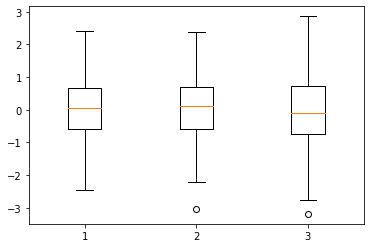

In [27]:
plt.boxplot(frame3)
plt.show()

In [28]:
len(frame3)

200

In [29]:
### remove outliers from each column
columns = [x for x in frame3.columns]
columns

['A', 'B', 'C']

In [30]:
for col in columns:
#     if col == "Latitude" or "Logitude":
#         #print("passed")
#         pass
    Q1 = frame3[col].quantile(0.25)
    Q3 = frame3[col].quantile(0.75)
    IQR = Q3 - Q1

    frame3 = frame3[~((frame3[col] < (Q1 - 1.5 * IQR)) | (frame3[col] > (Q3 + 1.5 * IQR)))]


In [31]:
len(frame3)

197

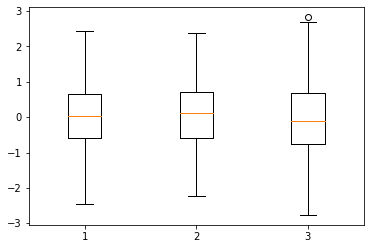

In [32]:
#Varify that outliers have been removed
plt.boxplot(frame3)
plt.show()

### check with skrew()

In [33]:
print(frame3.skew(axis = 0, skipna = True)) #axis = 0 column, axis = 1 row;

A   -0.236003
B   -0.116669
C    0.045752
dtype: float64


In [34]:
# sample skewvalue = near 0 is ok
dataVal = [(10,20,30,40,50,60,70),

           (10,20,30,40,50,60,70),

           (10,20,30,50,50,60,70)]

In [35]:
dataFrame = pd.DataFrame(data=dataVal);

skewValue = dataFrame.skew(axis=1)
skewValue

0    0.000000
1    0.000000
2   -0.251919
dtype: float64

In [36]:
dataVal2 = [(10,20,30,40,50,60,70),

           (10,20,40,40,50,60,70),

           (10,20,30,40,50,50,80)]
dataFrame2 = pd.DataFrame(data=dataVal2);

skewValue2 = dataFrame2.skew(axis=1)
skewValue2

0    0.000000
1   -0.259458
2    0.568329
dtype: float64

## Identifying Outliers with Visualization

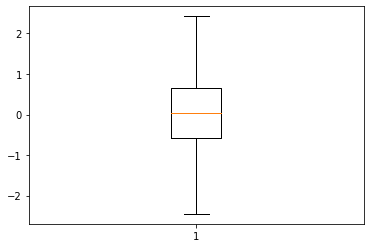

In [37]:
plt.boxplot(frame3["A"])
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x2446a93ad68>,
 'caps': [<matplotlib.lines.Line2D at 0x2446a96f358>,
 'boxes': [<matplotlib.lines.Line2D at 0x2446a93a080>,
 'medians': [<matplotlib.lines.Line2D at 0x2446a96f908>,
 'fliers': [<matplotlib.lines.Line2D at 0x2446a96fbe0>,
 'means': []}

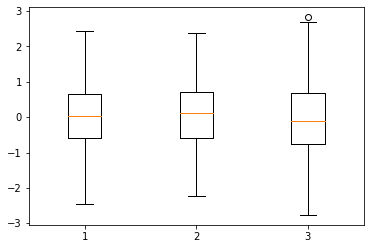

In [38]:
# notice that frames["C"] has outliers
plt.boxplot(frame3)

<AxesSubplot:>

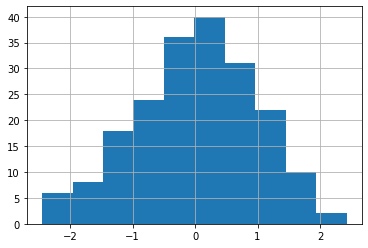

In [39]:
#Histogram
frame3.A.hist() # = frame3["C"].hist()

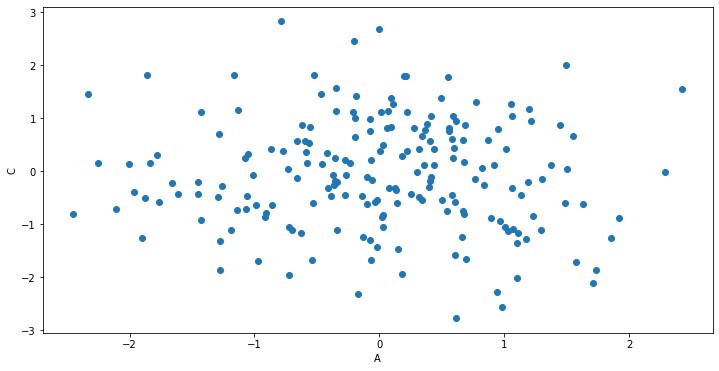

In [40]:
# scatter
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(frame3['A'], frame3['C'])
ax.set_xlabel('A')
ax.set_ylabel('C')
plt.show()

# Outlier Treatment

### calculate floor and ceiling

In [41]:
len(frame3)

197

In [42]:
Q31 = frame3["C"].quantile(0.25)
Q33 = frame3["C"].quantile(0.75)
IQR3 = Q33 -Q31

In [43]:
# since we found frames3["C"] has outliers, we just keep frame3 's values 
# within frame3.query('C > (Q31-1.5 * IQR) and C < (Q33 + 1.5 * IQR)') 
floor = Q31-1.5 * IQR3
ceiling = Q33 + 1.5 * IQR3
print(floor, ceiling)

-2.8805450227381617 2.8021091071718938


### use loc[ ]

In [44]:
df3 = frame3.loc[(frame3["C"] > floor) & (frame3["C"] < ceiling), :]
df3

,A,B,C
0,-0.520434,-1.550819,1.806995
1,-0.626886,-0.905434,-1.170803
3,0.319082,-1.414271,0.428488
4,-1.456250,-2.037431,-0.208340
5,0.555636,-1.748750,0.814967
...,...,...,...
194,-0.558816,-0.305846,0.842475
195,-0.588076,0.351967,0.361711
196,0.944749,-0.170696,-2.280787
197,1.137627,-0.584879,-0.445621


In [45]:
#after remove outliers, reset index, drop the original ones
df3.reset_index(drop=True)

,A,B,C
0,-0.520434,-1.550819,1.806995
1,-0.626886,-0.905434,-1.170803
2,0.319082,-1.414271,0.428488
3,-1.456250,-2.037431,-0.208340
4,0.555636,-1.748750,0.814967
...,...,...,...
191,-0.558816,-0.305846,0.842475
192,-0.588076,0.351967,0.361711
193,0.944749,-0.170696,-2.280787
194,1.137627,-0.584879,-0.445621


{'whiskers': [<matplotlib.lines.Line2D at 0x2446ab01400>,
 'caps': [<matplotlib.lines.Line2D at 0x2446ab019b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2446acb4710>,
 'medians': [<matplotlib.lines.Line2D at 0x2446ab01f60>,
 'fliers': [<matplotlib.lines.Line2D at 0x2446ab11278>,
 'means': []}

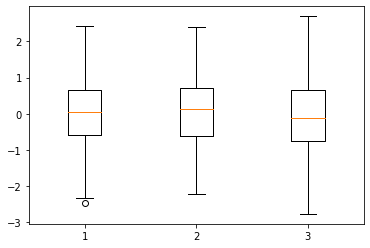

In [46]:
plt.boxplot(df3)

### save df into csv

In [47]:
#save cleaned dr3 into disk
df3.to_csv("df3.csv", index=False)

### check without outlier anymore

In [48]:
# check there is nothing outlier ana more
df4 = df3.loc[(df3["C"] < floor) | (df3["C"] > ceiling), :]
df4.head()

,A,B,C


### Use query()  to remove outliers, notice query only takes f string

In [49]:
df6 = frame3.query(f'C >= {floor} & C < {ceiling}')
df6

,A,B,C
0,-0.520434,-1.550819,1.806995
1,-0.626886,-0.905434,-1.170803
3,0.319082,-1.414271,0.428488
4,-1.456250,-2.037431,-0.208340
5,0.555636,-1.748750,0.814967
...,...,...,...
194,-0.558816,-0.305846,0.842475
195,-0.588076,0.351967,0.361711
196,0.944749,-0.170696,-2.280787
197,1.137627,-0.584879,-0.445621


In [50]:
# check df6 without any outlier any more
df7 = frame3.query(f'C < {floor} | C > {ceiling}')
df7

,A,B,C
80,-0.787421,0.866028,2.823968


{'whiskers': [<matplotlib.lines.Line2D at 0x2446abaedd8>,
 'caps': [<matplotlib.lines.Line2D at 0x2446abba3c8>,
 'boxes': [<matplotlib.lines.Line2D at 0x2446abae0f0>,
 'medians': [<matplotlib.lines.Line2D at 0x2446abba978>,
 'fliers': [<matplotlib.lines.Line2D at 0x2446abbac50>,
 'means': []}

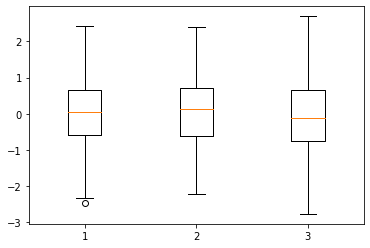

In [51]:
plt.boxplot(df3)

### use iloc[ ] to slicing df

In [52]:
# test use iloc[] to slicing df
df31 = frame3.iloc[[2, 3], [1, 2]]
df31.head()

,B,C
3,-1.414271,0.428488
4,-2.037431,-0.208340


## reset index

In [53]:
df4 = pd.DataFrame([('bird', 389.0),
                   ('bird', 24.0),
                   ('mammal', 80.5),
                   ('mammal', np.nan)],
                  index=['falcon', 'parrot', 'lion', 'monkey'],
                  columns=('class', 'max_speed'))
df4

,class,max_speed
falcon,bird,389.0
parrot,bird,24.0
lion,mammal,80.5
monkey,mammal,NaN


In [54]:
#use the drop parameter to avoid the old index being added as a column:
df4.reset_index(drop=True)

,class,max_speed
0,bird,389.0
1,bird,24.0
2,mammal,80.5
3,mammal,NaN


## save to csv

In [55]:
df5 = pd.DataFrame({'name': ['Raphael', 'Donatello'],
                   'mask': ['red', 'purple'],
                   'weapon': ['sai', 'bo staff']})
df5

,name,mask,weapon
0,Raphael,red,sai
1,Donatello,purple,bo staff


In [56]:
# save as test.csv
df5.to_csv("test.csv", index=False)